# **Predicting car sales using ML Algorithms**

Importing libraries

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [ ]:
#importing dataset
data=pd.read_csv("/content/2023 Car Dataset.csv")
data.head()

,Car Make,Car Model,Year,Body Type,Color Options,Fuel Type,Engine Size (L),Horsepower,Torque (Nm),Transmission Type,Acceleration (0-60 mph),Top Speed (mph),Mileage (MPG),Safety Features,Entertainment Features,Interior Features,Exterior Features,Price ($),Customer Ratings,Sales Figures (Units Sold)
0,Toyota,Camry,2022,Sedan,"White, Silver, Black",Gasoline,2.5,203,245,Automatic,7.9 seconds,135,31,"ABS, Airbags, Lane-Keeping Assist, Blind Spot...",8-inch Touchscreen Infotainment System,"Leather Seats, Power Driver's Seat, Dual-Zone...","LED Headlights, Alloy Wheels, Sunroof ...","28,500",4.5/5,"1,500"
1,Ford,F-150,2023,Truck,"Blue, Red, Gray",Gasoline,3.5,375,475,Automatic,6.1 seconds,145,23,"ABS, Airbags, Trailer Sway Control, Rear View...",12-inch SYNC 4 Infotainment System,"Cloth Seats, Power Windows, Keyless Entry ...","LED Taillights, Tow Hitch, Bed Liner ...","45,900",4.8/5,"2,200"
2,Honda,Civic,2023,Sedan,"Black, Blue, Silver",Gasoline,1.8,158,180,CVT,8.2 seconds,120,36,"ABS, Airbags, Lane Departure Warning, Rear Cr...",7-inch Display Audio System,"Cloth Seats, Bluetooth Connectivity, Push But...","LED Daytime Running Lights, Alloy Wheels ...","22,950",4.6/5,"2,800"
3,Chevrolet,Tahoe,2023,SUV,"Red, White, Gray",Gasoline,5.3,355,519,Automatic,7.1 seconds,130,19,"ABS, Airbags, Forward Collision Warning, Lane...",10.2-inch Infotainment System,"Leather Seats, Heated Front Seats, Third-Row ...","LED Headlights, Roof Rails, Power Liftgate ...","53,250",4.7/5,"1,000"
4,Tesla,Model 3,2023,Sedan,"Blue, Red, Silver",Electric,N/A,283 (est.),440 (est.),Automatic,5.2 seconds,140 (est.),125 (est.),"Enhanced Autopilot, Lane Departure Warning, A...",15.4-inch Infotainment Display,"Vegan Leather Seats, Heated Steering Wheel, P...","Panoramic Glass Roof, Power Trunk, Alloy Whee...","49,990",4.9/5,"4,500"


## Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0    Car Make                                                      164 non-null    object
 1    Car Model                                                     164 non-null    object
 2    Year                                                          164 non-null    int64 
 3    Body Type                                                     164 non-null    object
 4    Color Options                                                 164 non-null    object
 5    Fuel Type                                                     164 non-null    object
 6    Engine Size (L)                                               164 non-null    object
 7    Horsepower                                                    164 non-

df.info() provides details about the DataFrame's columns, data types, memory usage, and non-null values.

In [ ]:
data.describe()

,Year
count,164.000000
mean,2022.987805
std,0.110092
min,2022.000000
25%,2023.000000
50%,2023.000000
75%,2023.000000
max,2023.000000


df.describe() provides information such as the mean, standard deviation, minimum, maximum, and various percentiles for each numeric column in the DataFrame.

In [ ]:
## Remove any empty space in column names
for col in data.columns:
  if col.startswith(''):
    data[col.strip()] = data[col]
    data= data.drop([col], axis=1)

In [ ]:
#finding null values
data.isnull().sum()

Car Make                      0
Car Model                     0
Year                          0
Body Type                     0
Color Options                 0
Fuel Type                     0
Engine Size (L)               0
Horsepower                    0
Torque (Nm)                   0
Transmission Type             0
Acceleration (0-60 mph)       0
Top Speed (mph)               0
Mileage (MPG)                 0
Safety Features               0
Entertainment Features        1
Interior Features             1
Exterior Features             1
Price ($)                     0
Customer Ratings              2
Sales Figures (Units Sold)    2
dtype: int64

In [ ]:
#dropping null values
data.dropna(inplace=True)
data.isnull().sum().sum()

0

In [ ]:
#column names
data.columns


Index(['Car Make', 'Car Model', 'Year', 'Body Type', 'Color Options',
       'Fuel Type', 'Engine Size (L)', 'Horsepower', 'Torque (Nm)',
       'Transmission Type', 'Acceleration (0-60 mph)', 'Top Speed (mph)',
       'Mileage (MPG)', 'Safety Features', 'Entertainment Features',
       'Interior Features', 'Exterior Features', 'Price ($)',
       'Customer Ratings', 'Sales Figures (Units Sold)'],
      dtype='object')

In [ ]:
# Extracting unique engine sizes from the 'Engine Size (L)' column
data['Engine Size (L)'].unique()

array(['2.5', '3.5', '1.8', '5.3', ' N/A             ', '3', '5', '2',
       '6.2', '1.5', '2.4', '3.6', '1.4', '2.3', '3.8', '4', '2.7', '1.6'],
      dtype=object)

In [ ]:
data['Torque (Nm)'].unique()

array(['245', '475', '180', '519', ' 440 (est.)  ', '450', '570', '243',
       '350', '624', '240', '376', '881', '380', '251', '370', '353',
       '250', '239', '356', '420', '630', '650', '241', '355', '348',
       '351', '278', '379', '275', '172', '520', '237', '198', '267',
       '359', '500', '542', ' 360 (est.)  ', ' N/A         ', '349',
       '317', '263', '138', '277', '114', '148', '182', '310', '479',
       '262', '375', '281', '113', '311', '295', '139', '155', '186',
       '132', '470', ' 317 (est.)  ', '260', '273', '330', '181', '258',
       '151', '176', '280', '175', '190', '259'], dtype=object)

In [ ]:
#renaming the column names as per our ease
data.rename(columns={'Engine Size (L)':'EngineSize'},inplace=True)
data.rename(columns={'Sales Figures (Units Sold)':'Sales Figures'},inplace=True)
data.rename(columns={'Price ($)':'Price'},inplace=True)
data.rename(columns={'Acceleration (0-60 mph)':'Acceleration'},inplace=True)
data.rename(columns={'Torque (Nm)':'Torque'},inplace=True)
data.rename(columns={'Mileage (MPG)':'Mileage'},inplace=True)
data.rename(columns={'Top Speed (mph)':'Top Speed'},inplace=True)
data.rename(columns={'Car Make':'Carmake'},inplace=True)
data.rename(columns={'Customer Ratings':'Customer Ratings'},inplace=True)

In [ ]:
#replacing nulls with zero
data.Torque.replace({' N/A         ':'0'},inplace=True)
data.EngineSize.replace({' N/A             ':'0'},inplace=True)


## Data Transformation

In [ ]:
#We drop the comma from the whole column, and convert it to a float
data['Price'] = data['Price'].str.replace(',', '').astype(float)

#We also drop the comma and convert into float
data['Sales Figures'] = data['Sales Figures'].str.replace(',', '').astype(float)

#In this one, we drop the 'out of five (x/5)' part of the rating, might change the columns name to better reflect this in the future
data['Customer Ratings'] = data['Customer Ratings'].str.split('/').str[0].astype(float)

#We drop the word seconds from the column and convert it to a float
data['Acceleration'] = data['Acceleration'].str.replace(' seconds', '').astype(float)


#The following was to drop an abreviation that appeared as (est.) when it came to electric cars
data['Horsepower'] = data['Horsepower'].str.split('(').str[0]
data['Torque'] = data['Torque'].str.split('(').str[0]
data['Top Speed'] = data['Top Speed'].str.split('(').str[0]
data['Mileage'] = data['Mileage'].str.split('(').str[0]

data['Horsepower'] = data['Horsepower'].str.replace(',', '').astype(float)
data['Top Speed'] = data['Top Speed'].str.replace(',', '').astype(float)
data['Torque'] = data['Torque'].str.replace(',', '').astype(float)
data['Mileage'] = data['Mileage'].str.replace(',', '').astype(float)




In [ ]:
#datatypes of a columns
data.dtypes

Carmake                    object
Car Model                  object
Year                        int64
Body Type                  object
Color Options              object
Fuel Type                  object
EngineSize                 object
Horsepower                float64
Torque                    float64
Transmission Type          object
Acceleration              float64
Top Speed                 float64
Mileage                   float64
Safety Features            object
Entertainment Features     object
Interior Features          object
Exterior Features          object
Price                     float64
Customer Ratings          float64
Sales Figures             float64
dtype: object

## 1. **Car Comparison**: Compare different car makes and models based on specifications, features, and pricing.




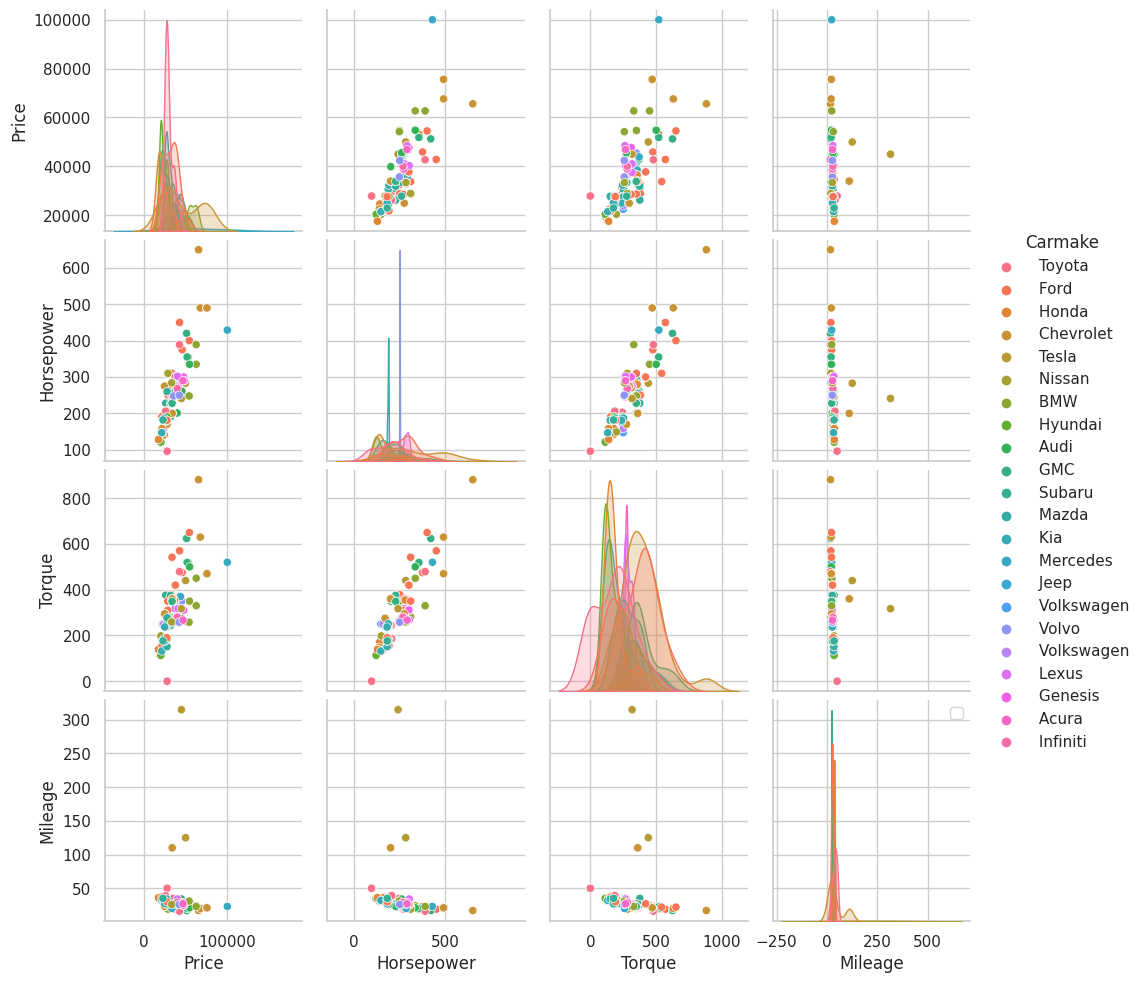

In [ ]:
# Choose a subset of columns for comparison
comparison_columns = ['Carmake', 'Car Model', 'Price', 'EngineSize', 'Horsepower', 'Torque','Mileage']

# Create a new DataFrame with the selected columns
comparison_data = data[comparison_columns]

# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a pairplot for the selected columns
sns.pairplot(comparison_data, hue="Carmake", diag_kind="kde")

# Add a legend
plt.legend()
plt.show()


The pair plot provides a visual tool to identify trends, correlations, and variations in features among different car makes. It can highlight differences and similarities in feature distributions.<br>The pair plot matrix displays scatter plots of each pair of selected features, showcasing how they interact with one another. The diagonal plots display the distribution of individual features using kernel density estimation.

## **2.Market Trends Analysis**: Analyze trends in car sales figures and customer ratings over different years.

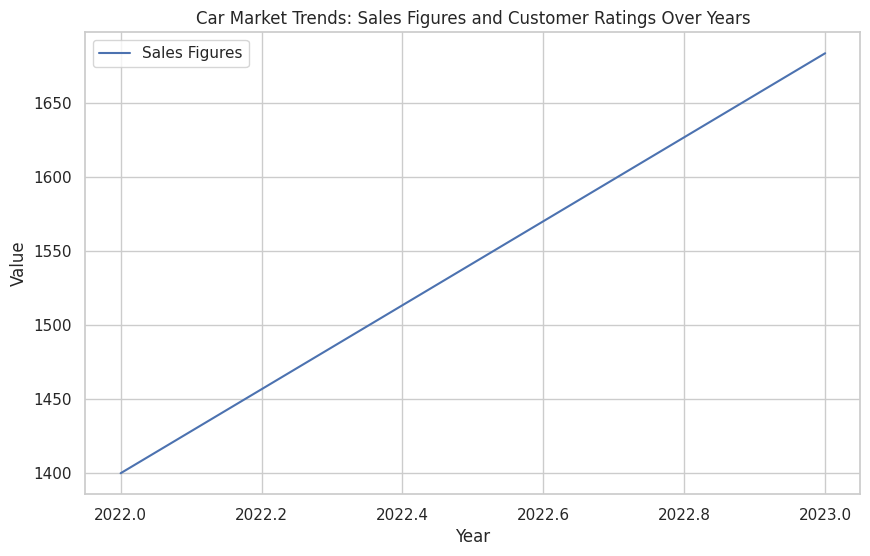

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Group data by Year and calculate mean sales figures and customer ratings
yearly_data = data.groupby('Year')[['Sales Figures', 'Customer Ratings']].mean().reset_index()

# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a line plot for Sales Figures and Customer Ratings over different years
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_data, x='Year', y='Sales Figures', label='Sales Figures')


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Car Market Trends: Sales Figures and Customer Ratings Over Years')

# Display the legend
plt.legend()

# Show the plot
plt.show()


**From the plot**:we observed that increasing sales of the car from 2022 to 2023

<Axes: xlabel='Year', ylabel='Customer Ratings'>

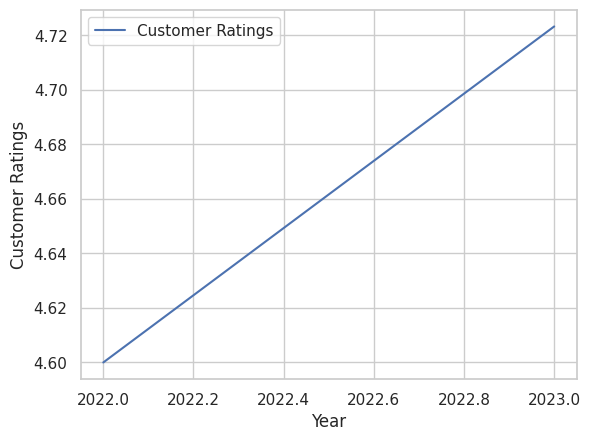

In [ ]:

sns.lineplot(data=yearly_data, x='Year', y='Customer Ratings', label='Customer Ratings')

## 3. **Fuel Efficiency Analysis**: Study how engine size, fuel type, and transmission affect mileage.



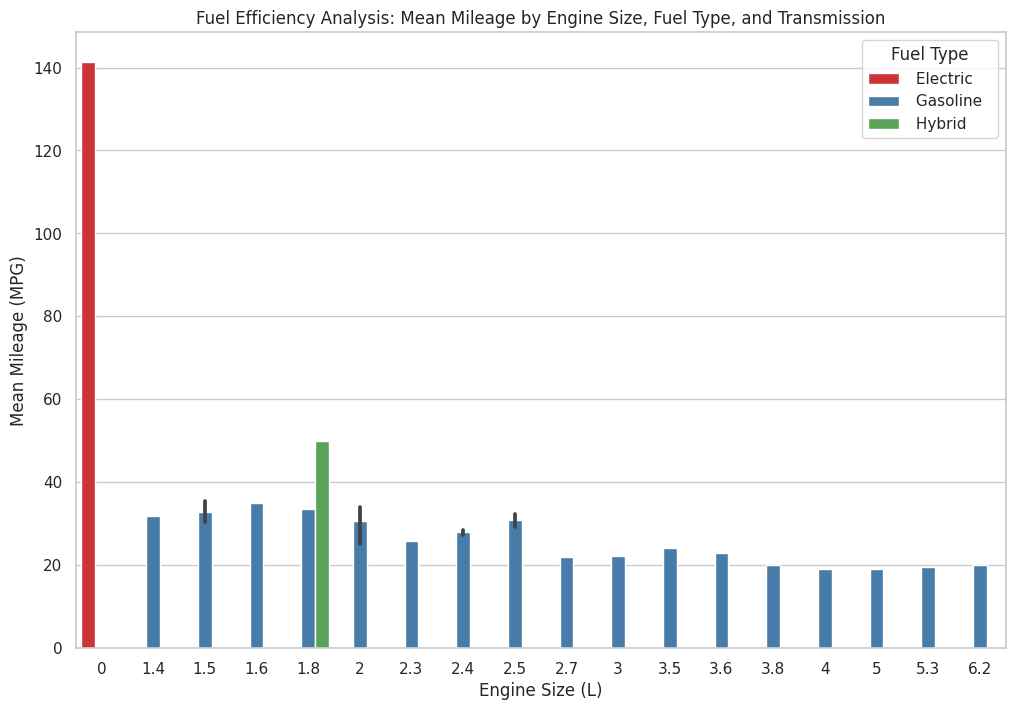

In [ ]:
# Calculate the mean mileage for each combination of Engine Size, Fuel Type, and Transmission Type
mean_mileage_data = data.groupby(['EngineSize', 'Fuel Type', 'Transmission Type'])['Mileage'].mean().reset_index()

# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a bar plot to analyze the mean Mileage based on Engine Size, Fuel Type, and Transmission Type
plt.figure(figsize=(12, 8))
sns.barplot(data=mean_mileage_data, x='EngineSize', y='Mileage', hue='Fuel Type',palette='Set1')
plt.xlabel('Engine Size (L)')
plt.ylabel('Mean Mileage (MPG)')
plt.title('Fuel Efficiency Analysis: Mean Mileage by Engine Size, Fuel Type, and Transmission')
plt.legend(title='Fuel Type',loc='best')
plt.show()


**Fuel Efficiency Comparison:** The bar plot compares the mean mileage (MPG) based on Engine Size, with bars grouped by Fuel Type and differentiated by colors within each group.<br>
**Key Insights:** The plot offers insights into how Fuel Type and Transmission Type impact fuel efficiency for different Engine Sizes.<br>
**Fuel Type Variation:** The coloring within each bar group represents different Fuel Types, allowing easy comparison of fuel efficiency between categories.


## **4.Performance Evaluation**: Analyze the relationship between horsepower, torque, acceleration, and top speed

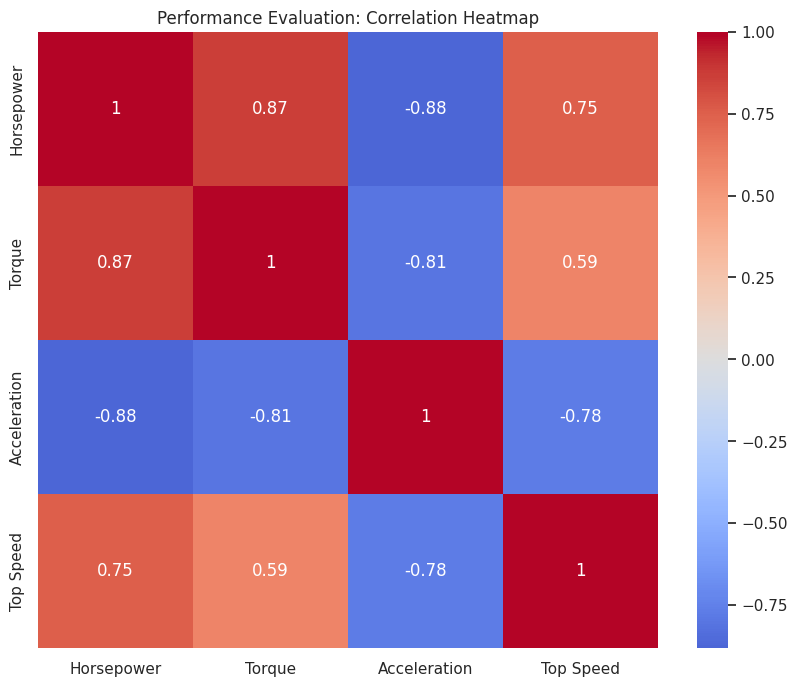

In [ ]:
# Select the relevant performance columns
performance_columns = ['Horsepower', 'Torque', 'Acceleration','Top Speed']

# Calculate the correlation matrix
correlation_matrix = data[performance_columns].corr()

# Set the style of Seaborn
sns.set(style="white")

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Performance Evaluation: Correlation Heatmap')
plt.show()


The correlation heatmap provides a visual representation of the correlation coefficients between the performance metrics. From the heatmap, it can be observed that:

There is a strong positive correlation between horsepower and top speed, which makes sense since more powerful engines tend to achieve higher top speeds.
<br>There is a moderate positive correlation between torque and horsepower, indicating that higher horsepower might be associated with higher torque.
<br>There is a weak negative correlation between acceleration and top speed, suggesting that faster acceleration might be associated with slightly lower top speeds.





## 5. **Color Preference Analysis**: Study consumer preferences for car colors.

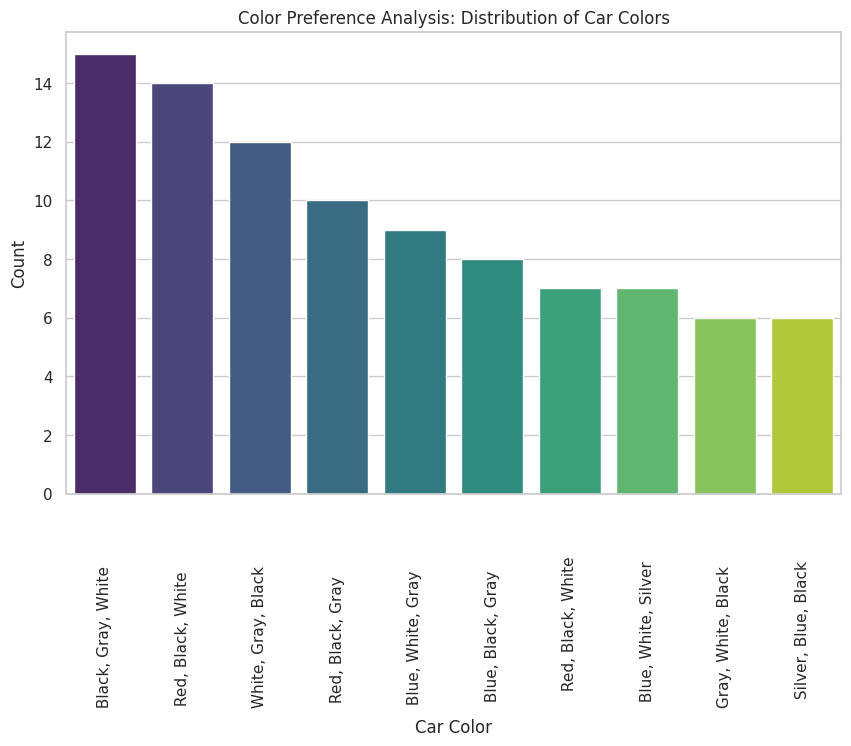

In [ ]:
# Count the occurrences of each color option
color_counts = data['Color Options'].value_counts().head(10)

# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a bar plot to analyze color preferences
plt.figure(figsize=(10, 6))
sns.barplot(x=color_counts.index, y=color_counts.values, palette='viridis')
plt.xlabel('Car Color')
plt.ylabel('Count')
plt.title('Color Preference Analysis: Distribution of Car Colors')
plt.xticks(rotation=90)
plt.show()


**Color Distribution:** The bar plot displays the distribution of different car colors based on their counts. Each bar represents a specific car color, and the height of the bar indicates how frequently that color appears in the dataset.

**Most Preferred Color:** The color with the tallest bar(Black,Gray,White) is the most preferred color among consumers in the dataset. This color has the highest count, suggesting that it's the most commonly chosen color for cars.

**Insight into Consumer Preferences:** The visualization helps car manufacturers and marketers understand which colors are more appealing to their target audience. This information can influence decisions related to production, inventory, and marketing strategies.

## **6.Body Type Impact**: Analyze how body type impacts customer ratings and sales figures.



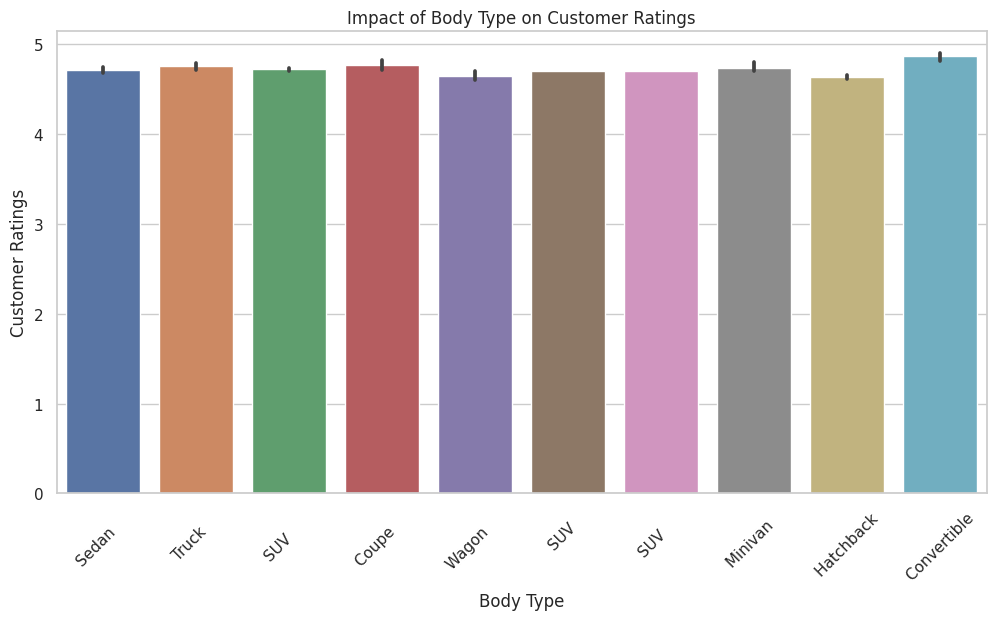

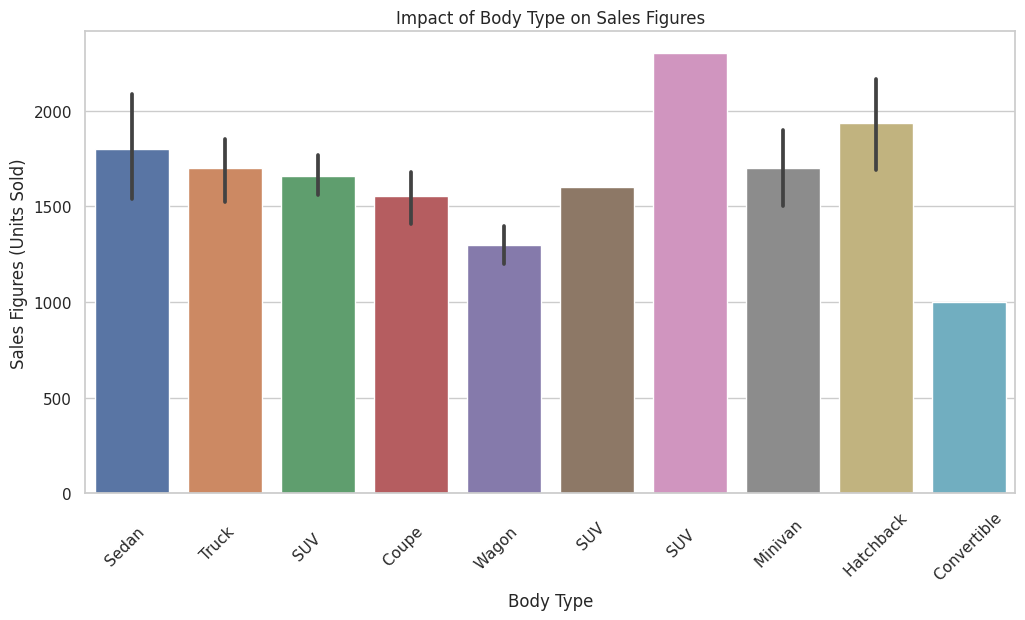

In [ ]:
# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a bar plot to analyze the impact of body type on customer ratings
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Body Type', y='Customer Ratings')
plt.xlabel('Body Type')
plt.ylabel('Customer Ratings')
plt.title('Impact of Body Type on Customer Ratings')
plt.xticks(rotation=45)
plt.show()

# Create a bar plot to analyze the impact of body type on sales figures
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Body Type', y='Sales Figures')
plt.xlabel('Body Type')
plt.ylabel('Sales Figures (Units Sold)')
plt.title('Impact of Body Type on Sales Figures')
plt.xticks(rotation=45)
plt.show()


**1. Impact on Customer Ratings**:
The first bar plot shows the impact of different car body types on customer ratings. Each bar represents a specific body type, and the height of the bar indicates the average customer ratings for that body type. From this plot:
In this convertible body type have the highest customer rating and hatchback body type have the lowest customer rating

**2. Impact on Sales Figures:**
The second bar plot shows the impact of different car body types on sales figure. Each bar represents a specific body type, and the height of the bar represents the average sales figures for that body type. <br>
3.**From this plot:** **bold text**
SUV body type have the highest sales
convertible body type have the lowest sales



## 7. **Transmission Preference**: Study consumer preference for manual vs. automatic transmission.

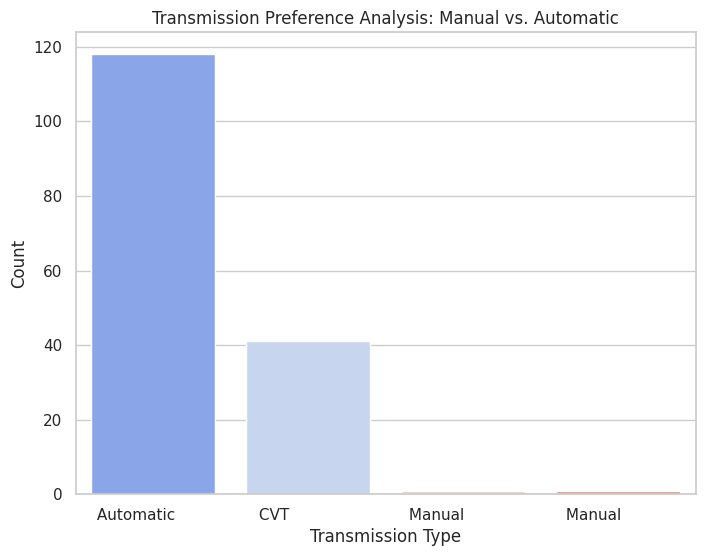

In [ ]:
# Count the occurrences of each transmission type
transmission_counts = data['Transmission Type'].value_counts()

# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a bar plot to analyze transmission preference
plt.figure(figsize=(8, 6))
sns.barplot(x=transmission_counts.index, y=transmission_counts.values, palette='coolwarm')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.title('Transmission Preference Analysis: Manual vs. Automatic')
plt.xticks(rotation=0)
plt.show()


**Preference Insights:** From the plot, Automatic transmission type is more preferred and Manual transmission type is less preferred by consumers The taller bar indicates the more preferred type, while the shorter bar indicates the less preferred type.


## **8.Price-Performance Relationship**: Analyze how price relates to car specifications and features.

<ipython-input-24-310f887e4c1a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[price_performance_columns].corr()


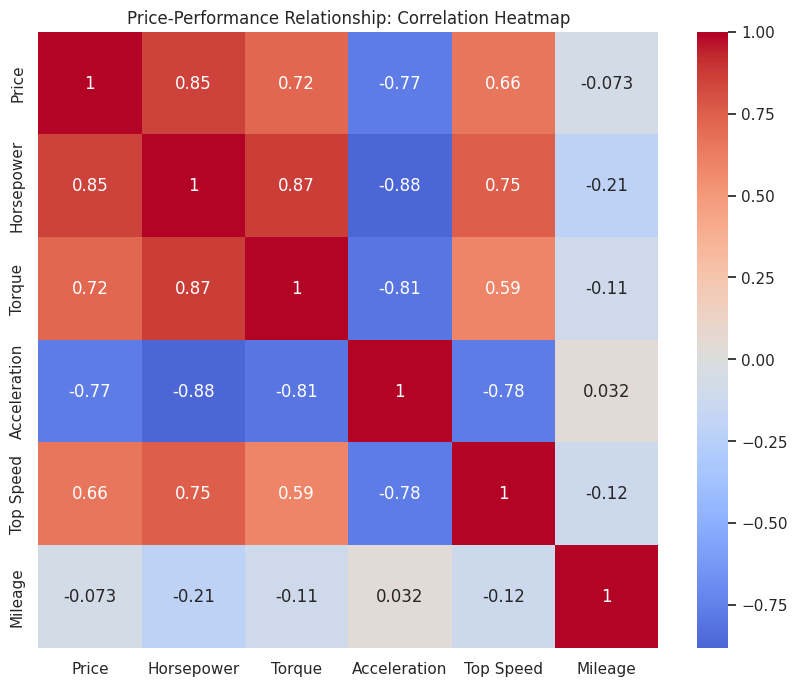

In [ ]:
# Select relevant columns for analysis
price_performance_columns = ['Price', 'EngineSize', 'Horsepower', 'Torque', 'Acceleration', 'Top Speed', 'Mileage']

# Calculate the correlation matrix
correlation_matrix = data[price_performance_columns].corr()

# Set the style of Seaborn
sns.set(style="white")

# Create a heatmap to visualize the correlation between price and performance metrics
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Price-Performance Relationship: Correlation Heatmap')
plt.show()


**Price-Performance Correlation**: The heatmap displays the correlation coefficients between car price and the selected performance metrics: engine size, horsepower, torque, acceleration, top speed, and mileage. Each cell in the heatmap represents the correlation between two variables.

**Strength and Direction of Relationships**:Positive correlations are shown in warmer colors, while negative correlations are shown in cooler colors. The intensity of the color indicates the strength of the correlation.

**Identifying Correlations**:from the plot: Top speed,Torque and horsePower performance metrics are strongly correlated with car price and price and Acceleration  have weaker correlations..



## **9.Safety Features Impact**: Study the relationship between safety features and customer ratings.

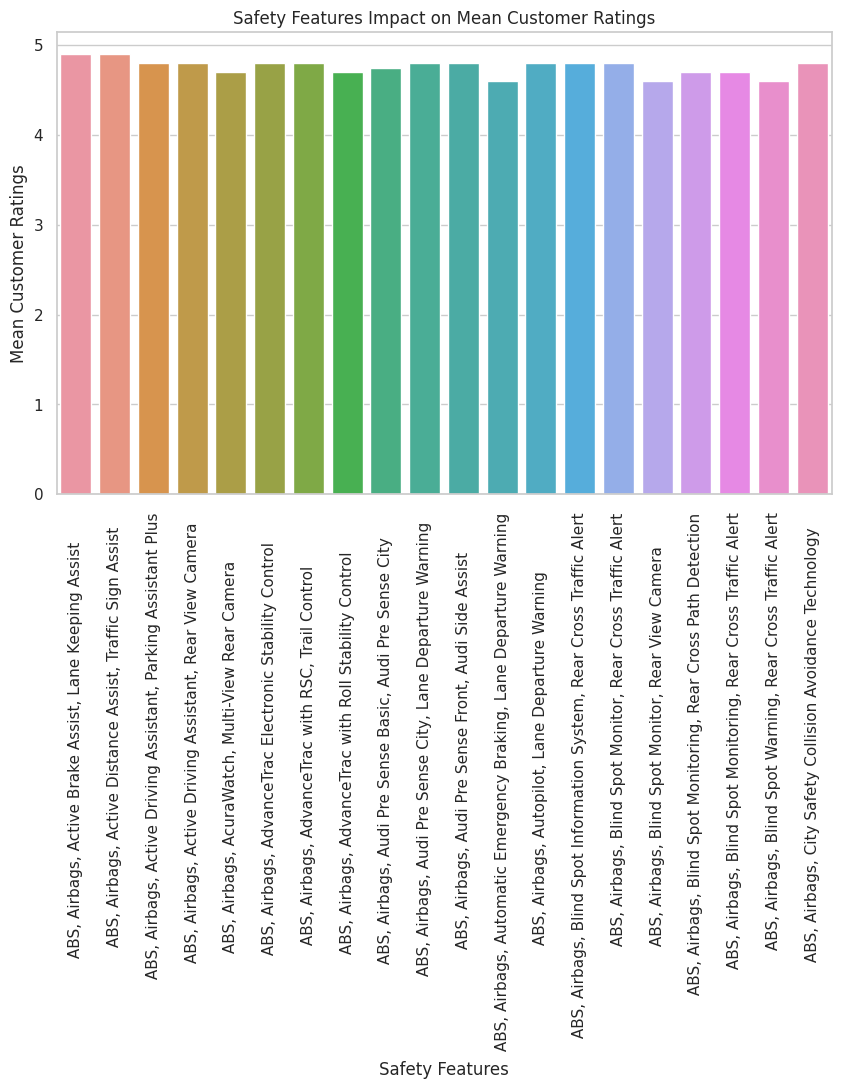

In [ ]:

# Calculate the mean customer ratings for each safety feature category
mean_ratings_by_safety = data.groupby('Safety Features')['Customer Ratings'].mean().reset_index()
mean_ratings_by_safety1=mean_ratings_by_safety.head(20)

# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a bar plot to analyze the relationship between safety features and mean customer ratings
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_ratings_by_safety1, x='Safety Features', y='Customer Ratings')
plt.xlabel('Safety Features')
plt.ylabel('Mean Customer Ratings')
plt.title('Safety Features Impact on Mean Customer Ratings')
plt.xticks(rotation=90)
plt.show()


**Safety Features and Mean Customer Ratings:** The bar plot displays the mean customer ratings for different safety feature categories. Each bar represents a specific safety feature category, and the height of the bar indicates the average customer rating for that category.

**Impact on Customer Ratings:** By observing the bar heights, you can identify which safety feature categories tend to have higher or lower mean customer ratings. This helps understand how safety features influence the overall satisfaction of customers.

**Comparative Analysis:** The bar plot allows for easy comparison between safety feature categories in terms of their impact on customer ratings. You can identify which safety features are more positively received by customers based on higher mean ratings.


## 10. **Entertainment and Interior Analysis**: Explore the impact of entertainment and interior features on ratings.

<ipython-input-26-e6e318e4f2b2>:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


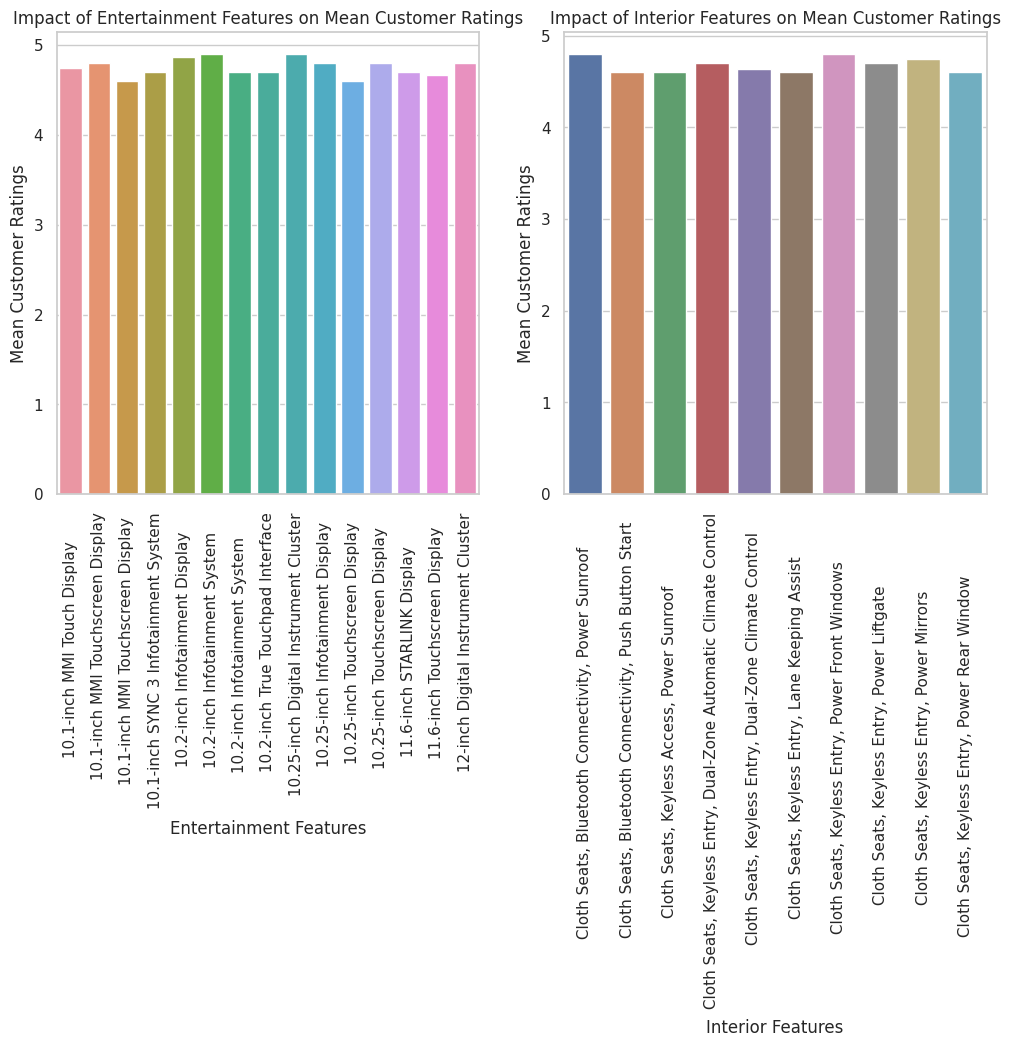

In [ ]:
# Select relevant columns for analysis
entertainment_interior_columns = ['Entertainment Features', 'Interior Features', 'Customer Ratings']

# Calculate the mean customer ratings for each entertainment and interior feature category
mean_ratings_by_entertainment = data.groupby('Entertainment Features')['Customer Ratings'].mean().reset_index().head(15)
mean_ratings_by_interior = data.groupby('Interior Features')['Customer Ratings'].mean().reset_index().head(10)

# Set the style of Seaborn
sns.set(style="whitegrid")

# Create bar plots to analyze the impact of entertainment and interior features on mean customer ratings
plt.figure(figsize=(12, 6))

# Bar plot for Entertainment Features
plt.subplot(1, 2, 1)
sns.barplot(data=mean_ratings_by_entertainment, x='Entertainment Features', y='Customer Ratings')
plt.xlabel('Entertainment Features')
plt.ylabel('Mean Customer Ratings')
plt.title('Impact of Entertainment Features on Mean Customer Ratings')
plt.xticks(rotation=90)

# Bar plot for Interior Features
plt.subplot(1, 2, 2)
sns.barplot(data=mean_ratings_by_interior, x='Interior Features', y='Customer Ratings')
plt.xlabel('Interior Features')
plt.ylabel('Mean Customer Ratings')
plt.title('Impact of Interior Features on Mean Customer Ratings')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


**Entertainment Features:** The left bar plot illustrates the mean customer ratings for various entertainment feature categories. It highlights which entertainment features tend to correlate with higher or lower mean ratings.

**Interior Features:** The right bar plot demonstrates the impact of different interior feature categories on mean customer ratings. It offers insights into the customer perception of interior features.

**Comparative Analysis:** By examining the bar heights, you can discern which specific entertainment and interior features have a more pronounced effect on mean customer ratings. This aids in understanding which features contribute to higher overall satisfaction.


## 11. **Exterior Features Analysis**: Study the influence of exterior features on customer preferences.

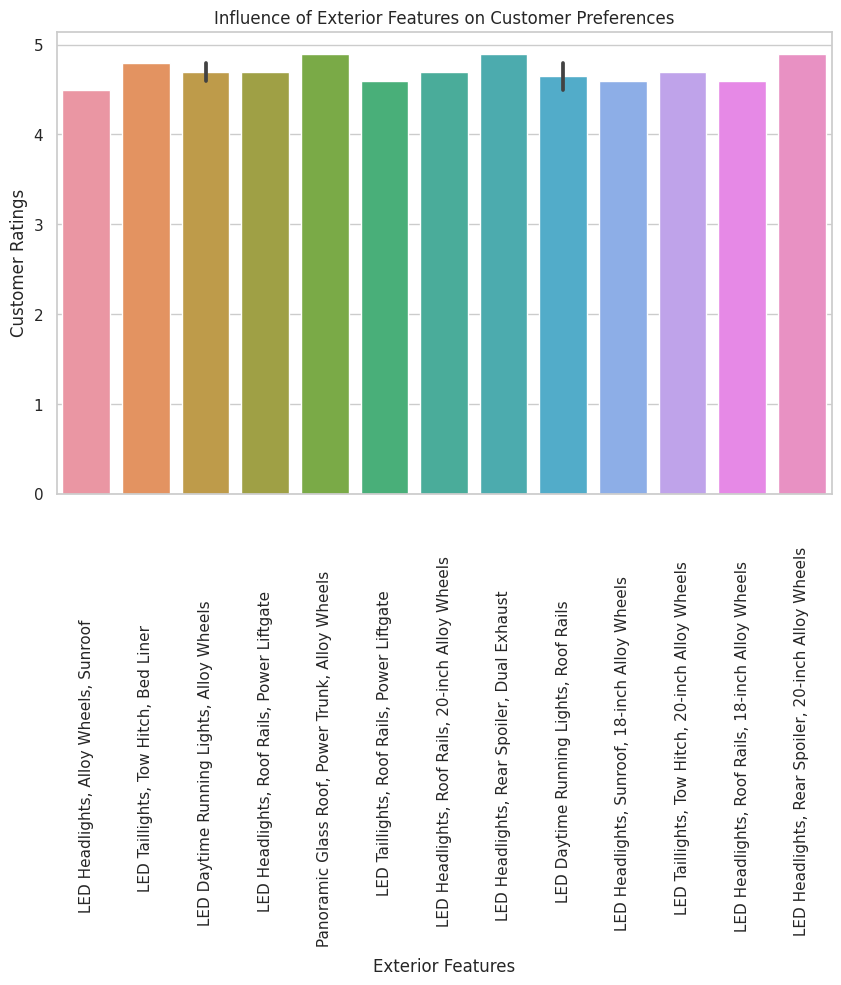

In [ ]:

# Select relevant columns for analysis
exterior_columns = ['Exterior Features', 'Customer Ratings']
data1=data.head(15)
# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a bar plot to analyze the influence of exterior features on customer preferences
plt.figure(figsize=(10, 6))
sns.barplot(data=data1, x='Exterior Features', y='Customer Ratings')
plt.xlabel('Exterior Features')
plt.ylabel('Customer Ratings')
plt.title('Influence of Exterior Features on Customer Preferences')
plt.xticks(rotation=90)
plt.show()


**Exterior Features Impact:** The bar plot compares the mean customer ratings for different exterior feature categories. Each bar represents a specific feature category, and the height of the bar indicates the average customer rating for that category.

**Comparative Analysis:** By observing the bar heights, you can identify which exterior feature categories tend to have higher or lower mean customer ratings. This helps understand which features are more positively received by customers.
<br>**From the plot:**we observed that LED Headlights,Rear spoiler,20_inch Alloy Wheels Exterior feature have the highest customer rating

## **12.Price Trends**: Analyze trends in car prices over different years.

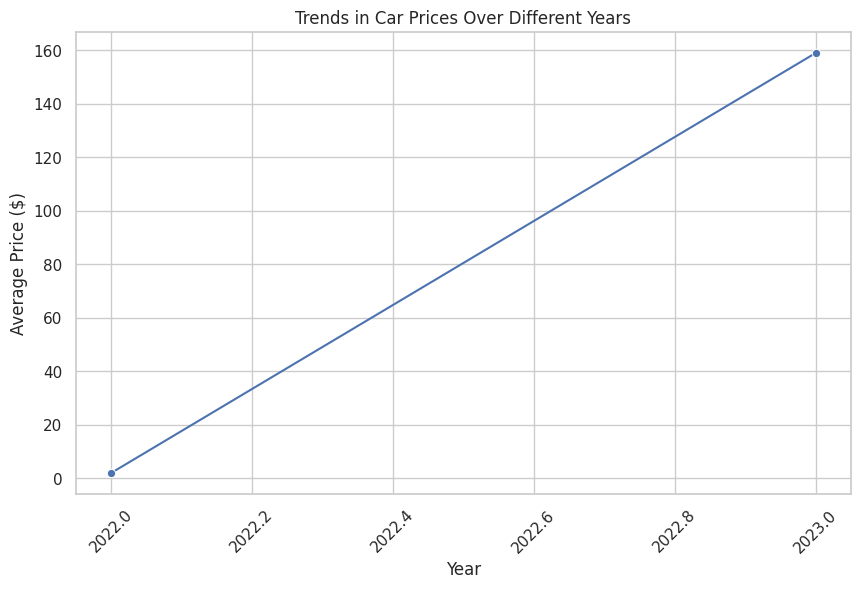

In [ ]:
# Select relevant columns for analysis
price_trends_data = data[['Year', 'Price']]

# Group the data by year and calculate the average price for each year
average_price_by_year = price_trends_data.groupby('Year')['Price'].count().reset_index()

# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a line plot to analyze trends in car prices over different years
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_price_by_year, x='Year', y='Price', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.title('Trends in Car Prices Over Different Years')
plt.xticks(rotation=45)
plt.show()


**Price Trends:** The line plot displays the average car prices for each year. Each data point on the line represents the average price of cars in that specific year.

**Yearly Changes**: The plot allows you to observe how car prices have changed over the years. Rising or falling trends in the line indicate periods of increased or decreased prices.<br>

**from the plot:**We observed that price was increasing from  2022 to 2023


## 13. **Predictive Models**: Build models to predict sales figures or customer ratings based on features.

## PCA Visualization

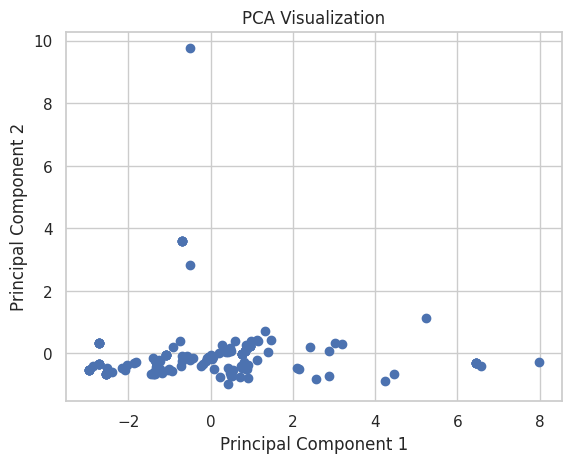

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# Select numerical features for PCA
numerical_features = [
    'EngineSize', 'Horsepower', 'Acceleration',
    'Top Speed', 'Mileage','Torque', 'Price', 'Sales Figures'
]

# Extract the numerical data
numerical_data = data[numerical_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply PCA
pca = PCA(n_components=2)  # You can choose the number of components
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Concatenate the PCA results with the original data
final_df = pd.concat([pca_df, data], axis=1)

# Plot the PCA results
plt.scatter(final_df['PC1'], final_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()


PCA's application and visualization facilitate dimensionality reduction and provide initial insights into the data's patterns, preparing the groundwork for further analysis and decision-making.

Now our data is completely clean now we can start fit our data into ml algorithm where Sales Figures is our target variable which tells that the sales of the car per unit sold

Lets try different algorithms and will select the best regressor algorithm that gives the best accuracy (we have a continuous values that's i choose regression)

In [ ]:
# Select the features and target variable
x=data[[ 'Horsepower','Acceleration','Top Speed','Mileage','Torque', 'Price']]
y=data[['Sales Figures']]

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/3,random_state=0)

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.transform(xtest)

In [ ]:
result= pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

Prediction using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Create a Linear Regression model
model_LR=LinearRegression()

# Fit the model to the training data
model_LR.fit(xtrain,ytrain)

# Make predictions on the test data
ypred=model_LR.predict(xtest)
ypred

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
mean_squared_error(ytest, ypred)
from sklearn.metrics import r2_score
r2_score(ytest, ypred)
accuracy=r2_score(ytest, ypred)*100
print("accuracy of model %.2f"%accuracy)
Linear_model_train_accuracy =r2_score(ytrain, model_LR.predict(xtrain))*100
Linear_model_test_accuracy =r2_score(ytest, model_LR.predict(xtest))*100

accuracy of model 41.88


In [ ]:
result = result.append(pd.Series({'Model':'LinearRegression','Train Accuracy':Linear_model_train_accuracy,'Test Accuracy':Linear_model_test_accuracy}),ignore_index=True )
result

<ipython-input-93-00ee52a82003>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'LinearRegression','Train Accuracy':Linear_model_train_accuracy,'Test Accuracy':Linear_model_test_accuracy}),ignore_index=True )


,Model,Train Accuracy,Test Accuracy
0,LinearRegression,18.83124,41.875277


Prediction using Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_scaled, ytrain)

# Make predictions on the testing data
predictions = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(ytest, predictions)
print("Accuracy:", accuracy)
Logistic_model_train_accuracy =r2_score(ytrain, model.predict(xtrain))*100
Logistic_model_test_accuracy =r2_score(ytest, model.predict(xtest))*100


Accuracy: 0.2962962962962963


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
result = result.append(pd.Series({'Model':'LogisticRegression','Train Accuracy':Logistic_model_train_accuracy,'Test Accuracy':Logistic_model_test_accuracy}),ignore_index=True )
result

<ipython-input-94-7bb38cb868cd>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'LogisticRegression','Train Accuracy':Logistic_model_train_accuracy,'Test Accuracy':Logistic_model_test_accuracy}),ignore_index=True )


,Model,Train Accuracy,Test Accuracy
0,LinearRegression,18.831240,41.875277
1,LogisticRegression,24.442394,51.102204


Prediction using DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
#create  DecisionTreeRegressor
model_DC=DecisionTreeRegressor()

#fit the model to the training data
model_DC.fit(xtrain,ytrain)

# Make predictions on the test data
ypred=model_DC.predict(xtest)
ypred

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
mean_squared_error(ytest, ypred)
from sklearn.metrics import r2_score
r2_score(ytest, ypred)
accuracy=r2_score(ytest, ypred)*100
print("accuracy of model %.2f"%accuracy)
DecisionTree_model_train_accuracy =r2_score(ytrain, model_DC.predict(xtrain))*100
DecisionTree_model_test_accuracy =r2_score(ytest, model_DC.predict(xtest))*100


accuracy of model 28.50


In [ ]:
result =result.append(pd.Series({'Model':'DecisionTree Regression','Train Accuracy':DecisionTree_model_train_accuracy,'Test Accuracy':DecisionTree_model_test_accuracy}),ignore_index=True )
result

<ipython-input-96-7a64d20fb986>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result =result.append(pd.Series({'Model':'DecisionTree Regression','Train Accuracy':DecisionTree_model_train_accuracy,'Test Accuracy':DecisionTree_model_test_accuracy}),ignore_index=True )


,Model,Train Accuracy,Test Accuracy
0,LinearRegression,18.831240,41.875277
1,LogisticRegression,24.442394,51.102204
2,DecisionTree Regression,100.000000,28.496994


Prediction using RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#create RandomForestRegressor
model_RF= RandomForestRegressor()

#Fit the model
model_RF.fit(xtrain,ytrain)

# Make predictions on the test data
ypred=model_RF.predict(xtest)

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
mean_squared_error(ytest, ypred)
from sklearn.metrics import r2_score
r2_score(ytest, ypred)
accuracy=r2_score(ytest, ypred)*100
print("accuracy of model %.2f"%accuracy)
RandomForest_model_train_accuracy =r2_score(ytrain, model_RF.predict(xtrain))*100
RandomForest_model_test_accuracy =r2_score(ytest, model_RF.predict(xtest))*100


accuracy of model 73.87


<ipython-input-80-31f04297f76c>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF.fit(xtrain,ytrain)


In [ ]:
result = result.append(pd.Series({'Model':'RandomForest Regression','Train Accuracy':RandomForest_model_train_accuracy,'Test Accuracy':RandomForest_model_test_accuracy}),ignore_index=True )
result

<ipython-input-97-e6f3b50adfbd>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'RandomForest Regression','Train Accuracy':RandomForest_model_train_accuracy,'Test Accuracy':RandomForest_model_test_accuracy}),ignore_index=True )


,Model,Train Accuracy,Test Accuracy
0,LinearRegression,18.831240,41.875277
1,LogisticRegression,24.442394,51.102204
2,DecisionTree Regression,100.000000,28.496994
3,RandomForest Regression,88.996070,73.869868


Prediction using GradientBoostingRegressor

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Create the model (using GradientBoostingRegressor)
model_GB = GradientBoostingRegressor()

# Fit the model
model_GB.fit(xtrain, ytrain)

# Make predictions on the test data
ypred = model_GB.predict(xtest)

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(ytest, ypred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate R-squared score to evaluate the model's performance
r2 = r2_score(ytest, ypred)
print(f"R-squared Score: {r2:.2f}")

# Calculate accuracy as the R-squared score
accuracy = r2 * 100
print(f"Accuracy of the model: {accuracy:.2f}%")
GradientBoosting_model_train_accuracy =r2_score(ytrain, model_LR.predict(xtrain))*100
GradientBoosting_model_test_accuracy =r2_score(ytest, model_LR.predict(xtest))*100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 104833.29
R-squared Score: 0.55
Accuracy of the model: 54.62%


In [ ]:
result = result.append(pd.Series({'Model':'GradientBoostingr Regression','Train Accuracy':GradientBoosting_model_train_accuracy,'Test Accuracy':GradientBoosting_model_test_accuracy}),ignore_index=True )
result

<ipython-input-98-356e5eb40b6b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'GradientBoostingr Regression','Train Accuracy':GradientBoosting_model_train_accuracy,'Test Accuracy':GradientBoosting_model_test_accuracy}),ignore_index=True )


,Model,Train Accuracy,Test Accuracy
0,LinearRegression,18.831240,41.875277
1,LogisticRegression,24.442394,51.102204
2,DecisionTree Regression,100.000000,28.496994
3,RandomForest Regression,88.996070,73.869868
4,GradientBoostingr Regression,20.374711,36.046537


In [ ]:
pip install xgboost lightgbm catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.8 MB/s eta 0:00:00


prediction using CatBoostRegressor

In [ ]:
import catboost
from catboost import CatBoostRegressor


from sklearn.metrics import mean_squared_error

# Create CatBoost regressor
model_cat = CatBoostRegressor()

# Fit the model
model_cat.fit(xtrain, ytrain)

# Make predictions
y_pred_cat = model_cat.predict(xtest)

# Calculate Mean Squared Error
accuracy=r2_score(ytest, y_pred_cat)*100
print("accuracy of model %.2f"%accuracy)
CatBoost_model_train_accuracy =r2_score(ytrain, model_cat.predict(xtrain))*100
CatBoost_model_test_accuracy =r2_score(ytest, model_cat.predict(xtest))*100




Learning rate set to 0.028762
0:	learn: 560.3520859	total: 46.9ms	remaining: 46.8s
1:	learn: 555.1536999	total: 47.9ms	remaining: 23.9s
2:	learn: 549.3064135	total: 48.7ms	remaining: 16.2s
3:	learn: 544.1626730	total: 49.4ms	remaining: 12.3s
4:	learn: 538.9552022	total: 49.9ms	remaining: 9.93s
5:	learn: 534.0067050	total: 50.7ms	remaining: 8.39s
6:	learn: 527.8805948	total: 51.5ms	remaining: 7.3s
7:	learn: 523.3732845	total: 52.1ms	remaining: 6.46s
8:	learn: 520.3135808	total: 52.9ms	remaining: 5.82s
9:	learn: 517.3400875	total: 53.5ms	remaining: 5.3s
10:	learn: 512.4388381	total: 54.2ms	remaining: 4.87s
11:	learn: 508.0630096	total: 54.9ms	remaining: 4.52s
12:	learn: 503.9154745	total: 55.6ms	remaining: 4.22s
13:	learn: 500.7876104	total: 56.3ms	remaining: 3.96s
14:	learn: 496.6969148	total: 56.9ms	remaining: 3.74s
15:	learn: 492.4561336	total: 57.6ms	remaining: 3.54s
16:	learn: 489.3566055	total: 58.3ms	remaining: 3.37s
17:	learn: 485.7979969	total: 58.9ms	remaining: 3.21s
18:	learn:

In [ ]:
result = result.append(pd.Series({'Model':'CatBoostRegression','Train Accuracy':CatBoost_model_train_accuracy,'Test Accuracy':CatBoost_model_test_accuracy}),ignore_index=True )
result

<ipython-input-99-d0736ae2b5a6>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'CatBoostRegression','Train Accuracy':CatBoost_model_train_accuracy,'Test Accuracy':CatBoost_model_test_accuracy}),ignore_index=True )


,Model,Train Accuracy,Test Accuracy
0,LinearRegression,18.831240,41.875277
1,LogisticRegression,24.442394,51.102204
2,DecisionTree Regression,100.000000,28.496994
3,RandomForest Regression,88.996070,73.869868
4,GradientBoostingr Regression,20.374711,36.046537
5,CatBoostRegression,99.852226,67.650070


prediction using XGBoost regressor

In [ ]:
import xgboost as xgb


from sklearn.metrics import mean_squared_error

# Create XGBoost regressor
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')

# Fit the model
model_xgb.fit(xtrain, ytrain)

# Make predictions
y_pred_xgb = model_xgb.predict(xtest)

# Calculate Mean Squared Error
accuracy=r2_score(ytest, y_pred_xgb)*100
print("accuracy of model %.2f"%accuracy)
xgboost_model_train_accuracy =r2_score(ytrain, model_xgb.predict(xtrain))*100
xgboost_model_test_accuracy =r2_score(ytest, model_xgb.predict(xtest))*100

accuracy of model 60.35


In [ ]:
result = result.append(pd.Series({'Model':'xgboostRegression','Train Accuracy':xgboost_model_train_accuracy,'Test Accuracy':xgboost_model_test_accuracy}),ignore_index=True )
result

<ipython-input-100-d619b0be75ff>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'xgboostRegression','Train Accuracy':xgboost_model_train_accuracy,'Test Accuracy':xgboost_model_test_accuracy}),ignore_index=True )


,Model,Train Accuracy,Test Accuracy
0,LinearRegression,18.831240,41.875277
1,LogisticRegression,24.442394,51.102204
2,DecisionTree Regression,100.000000,28.496994
3,RandomForest Regression,88.996070,73.869868
4,GradientBoostingr Regression,20.374711,36.046537
5,CatBoostRegression,99.852226,67.650070
6,xgboostRegression,100.000000,60.347903


prediction using lightGBM regressor

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error


# Create LightGBM regressor
model_lgb = lgb.LGBMRegressor()

# Fit the model
model_lgb.fit(xtrain, ytrain)

# Make predictions
y_pred_lgb = model_lgb.predict(xtest)

# Calculate Mean Squared Error
accuracy=r2_score(ytest, y_pred_lgb)*100
print("accuracy of model %.2f"%accuracy)
LightGBM_model_train_accuracy =r2_score(ytrain, model_lgb.predict(xtrain))*100
LightGBM_model_test_accuracy =r2_score(ytest, model_lgb.predict(xtest))*100



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 107, number of used features: 6
[LightGBM] [Info] Start training from score 1661.682243
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
result = result.append(pd.Series({'Model':'lightgbm Regression','Train Accuracy':LightGBM_model_train_accuracy,'Test Accuracy':LightGBM_model_test_accuracy}),ignore_index=True )
result

<ipython-input-102-374e21fb52cd>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'lightgbm Regression','Train Accuracy':LightGBM_model_train_accuracy,'Test Accuracy':LightGBM_model_test_accuracy}),ignore_index=True )


,Model,Train Accuracy,Test Accuracy
0,LinearRegression,18.831240,41.875277
1,LogisticRegression,24.442394,51.102204
2,DecisionTree Regression,100.000000,28.496994
3,RandomForest Regression,88.996070,73.869868
4,GradientBoostingr Regression,20.374711,36.046537
5,CatBoostRegression,99.852226,67.650070
6,xgboostRegression,100.000000,60.347903
7,lightgbm Regression,66.915839,57.825511


##**14.Customer Preference Segmentation:**Segment customers based on their preferences and analyze their impact on sales.

Segmenting customers based on their preference is done using K-Means clustering. This technique allows us to group customers with similar attributes together.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


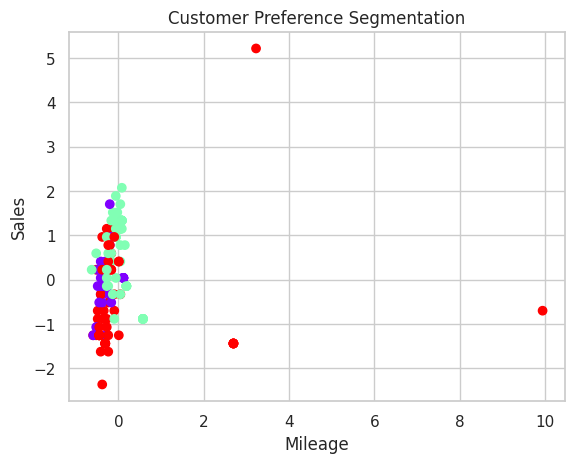

      Carmake      Car Model  Year    Body Type  \
0   Toyota      Camry         2022   Sedan        
1   Ford        F-150         2023   Truck        
2   Honda       Civic         2023   Sedan        
3   Chevrolet   Tahoe         2023   SUV          
4   Tesla       Model 3       2023   Sedan        

                     Color Options    Fuel Type EngineSize  Horsepower  \
0   White, Silver, Black             Gasoline          2.5       203.0   
1   Blue, Red, Gray                  Gasoline          3.5       375.0   
2   Black, Blue, Silver              Gasoline          1.8       158.0   
3   Red, White, Gray                 Gasoline          5.3       355.0   
4   Blue, Red, Silver                Electric            0       283.0   

   Torque    Transmission Type  ...  Top Speed   Mileage  \
0   245.0    Automatic          ...      135.0 -0.095271   
1   475.0    Automatic          ...      145.0 -0.378010   
2   180.0   CVT                 ...      120.0  0.081441   
3   519.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Convert categorical data to numerical using label encoding
label_encoder = LabelEncoder()
categorical_columns = ['Entertainment Features', 'Interior Features', 'Exterior Features', 'Customer Ratings']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Standardize numerical column
numerical_columns = ['Mileage','Sales Figures']
data[numerical_columns] = (data[numerical_columns] - data[numerical_columns].mean()) / data[numerical_columns].std()

# Perform K-Means clustering
X = data[['Entertainment Features', 'Interior Features', 'Exterior Features', 'Customer Ratings','Sales Figures','Mileage']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(data['Mileage'], data['Sales Figures'], c=data['cluster'], cmap='rainbow')
plt.xlabel('Mileage')
plt.ylabel('Sales')
plt.title('Customer Preference Segmentation')
plt.show()

# Display the first few rows of the segmented dataset
print(data.head())


Insights:

The scatter plot illustrates how the data points are distributed based on Mileage and Sales Figures after clustering.
Different clusters are represented by different colors on the scatter plot.
The labeled clusters allow for an initial exploration of how customer preferences (represented by features and ratings) relate to Mileage and Sales Figures.

**Summary/Conclusion:**
Project Title:
Build models to predict sales figures of a Car using ML Algorithms

**Objective**:
The project aims to Build modls to predict sales figures based on feati=ures using machine learning techniques.

**Project Steps:**
Data Loading and Exploration:
Load the dataset from 'cars.csv' containing features of the car. Explore the dataset's structure, summary statistics, and data distributions.

**Data Preprocessing:**
 Handle any missing data, outliers, or inconsistencies,data transformation.

**Feature Engineering:**
selecting important features to predict the car sales

**Data Splitting:**
Split the dataset into training and testing sets. train_test_split is used to allocate a portion of the data for model training and evaluation.

**Model Training:**
Use a logistic regression model to train a Regressor model on the preprocessed training data. Apply feature scaling using StandardScaler to normalize the feature values and linear regression,randomforest regressor,Decisiontree regressor.

**Model Evaluation:**
Calculate various evaluation metrics such as accuracy, precision, recall, and F1-score to assess the model's performance. Use accuracy_score, precision_score, recall_score, f1_score, and confusion_matrix.

**Model Interpretation:**
Interpret the trained model to understand how different measurements contribute to the predicted class. Visualize feature importance using a coefficient plot to highlight the significance of individual features.

**Conclusion:**
Summarize the project's findings, including model performance, important features, and insights gained from the analysis.

**Key Techniques and Tools Used:**
Data preprocessing using pandas. Feature engineering to create new features. Splitting the data into training and testing sets using train_test_split. Model training using RandomForest regressor. Model evaluation using various metrics. Model interpretation through feature importance visualization.

In conclusion, this project showcased a complete pipeline of predicting car sales, from data loading and preprocessing to model training, evaluation, and interpretation.RandomForest Regressor give the highest accuracy and this regressor model is preferred for predicting car sales